# datascience 3 assignment
### Ruben Otter, 372357 (or 357372, still don't know)

in this jupyter notebook file, I'm using data recorded by Max Little from the University of Oxford, in 
collaboration with the National Centre for Voice and Speech, Denver, 
Colorado, who recorded speech signals.

I will test three different models on the data, to predict weather a person has parkinson or not.

data: http://archive.ics.uci.edu/ml/datasets/Parkinsons

Research Paper: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5434464/

In [2]:
import pandas as pd
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
%matplotlib inline

In [3]:
data = pd.read_csv('data/parkinsons.data')
data.head()

profile = ProfileReport(data, minimal=True)
profile.to_file("data.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 398.24it/s]


## data information
from the data report, we can see that there are no missing values. the data contains 24 variables and 195 observations, this is a relatively small dataset, so no need to perform any feature engineering.

the data contains voice recordings of 31 people, of which 23 have parkinson. the aim of this program is to use the data to predict whether a person has parkinson or not.

(especially in healthcare) it is important to minimalize the false negatives, so we will use different models to predict whether a person has parkinson or not and search for the best model.

In [4]:
df = data.copy()
df.drop(['name'], axis=1, inplace=True)

'''split data into train and test'''
x_train, x_test, y_train, y_test = train_test_split(df.drop(['status'], axis=1), df['status'], test_size=0.2, random_state=0)

In [5]:
'''normalizing the data'''
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test) 

# K-nearest neighbours

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.96      0.93      0.95        29

    accuracy                           0.92        39
   macro avg       0.89      0.92      0.90        39
weighted avg       0.93      0.92      0.92        39

0.9230769230769231


[]

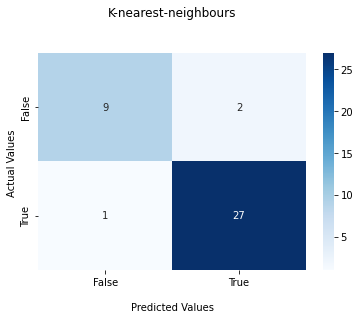

In [6]:
'''perform KNN'''

# Use the KNN classifier to fit data:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train) 

# Predict y data with classifier: 
y_predict = classifier.predict(x_test)

# Print results: 
#print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))
print(accuracy_score(y_test, y_predict))

ax = sns.heatmap(confusion_matrix(y_predict, y_test), annot=True, cmap='Blues')

ax.set_title('K-nearest-neighbours\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.plot()

We can see that the KNN model predicts the status of a patient quite well, the model has an accuracy of 92%, but predicted one false negative. in my opinion, the model is usable, but the user has to keep an eye out for false negatives.

# Naive bayes

              precision    recall  f1-score   support

           0       0.45      1.00      0.62        10
           1       1.00      0.59      0.74        29

    accuracy                           0.69        39
   macro avg       0.73      0.79      0.68        39
weighted avg       0.86      0.69      0.71        39

0.6923076923076923


[]

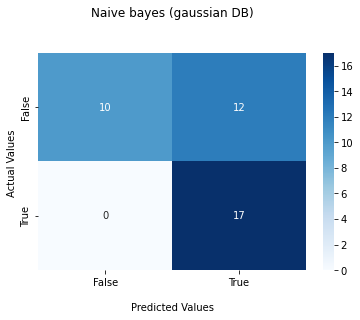

In [7]:
from sklearn.naive_bayes import GaussianNB

# Initialize classifier:
gnb = GaussianNB()

# Train the classifier:
model = gnb.fit(x_train, y_train)
# Make predictions with the classifier:
y_predict = gnb.predict(x_test)

# Evaluate label (subsets) accuracy:
print(classification_report(y_test, y_predict))
print(accuracy_score(y_test, y_predict))

ax = sns.heatmap(confusion_matrix(y_predict, y_test), annot=True, cmap='Blues')

ax.set_title('Naive bayes (gaussian DB)\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.plot()

We can see that the naive bayes model is not a good model for this situation. the accuracy is only 69%, which is quite low and is even worse than the random guess (which is 74,2%), so the model does not perform well. the only good thing is that it does not predict any false negatives. I think the model does not perform well, because the data is not continuous, so it is not possible to use the naive bayes model.

# Xgboost
last, we will use a boosting algorithm, this is a model, containing multiple machine learning models. Xgboost has won multiple machine learning competitions and is considered as one of the best models in the field.

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.93      0.96        29

    accuracy                           0.95        39
   macro avg       0.92      0.97      0.94        39
weighted avg       0.96      0.95      0.95        39

0.9487179487179487


[]

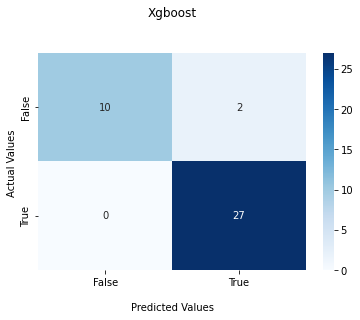

In [8]:
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print(classification_report(y_test, y_predict))
print(accuracy_score(y_test, y_predict))

ax = sns.heatmap(confusion_matrix(y_predict, y_test), annot=True, cmap='Blues')

ax.set_title('Xgboost\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.plot()

## evaluation
as we can see, the accuracy is 95%, this is a very good model. aside from this it also does not predict any false negatives, which is also really good.

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.93      0.93      0.93        29

    accuracy                           0.90        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.90      0.90      0.90        39

0.8974358974358975


[]

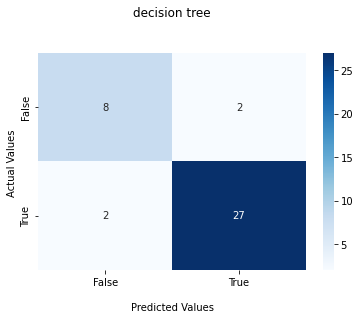

In [15]:
'''decision tree'''
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print(classification_report(y_test, y_predict))
print(accuracy_score(y_test, y_predict))

ax = sns.heatmap(confusion_matrix(y_predict, y_test), annot=True, cmap='Blues')

ax.set_title('decision tree\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.plot()

## evalutation

using a decision tree classifier, we can see that the accuracy is 89,7%. this makes it not a very good model, but not a bad one either. the model predicts a lot of false negatives, which makes the model unusable for this situation.

linear
              precision    recall  f1-score   support

           0       0.58      0.70      0.64        10
           1       0.89      0.83      0.86        29

    accuracy                           0.79        39
   macro avg       0.74      0.76      0.75        39
weighted avg       0.81      0.79      0.80        39

0.7948717948717948
--------------------------------------------------------
poly
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.88      1.00      0.94        29

    accuracy                           0.90        39
   macro avg       0.94      0.80      0.84        39
weighted avg       0.91      0.90      0.89        39

0.8974358974358975
--------------------------------------------------------
sigmoid
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.90      0.97      0.93        29

    accura

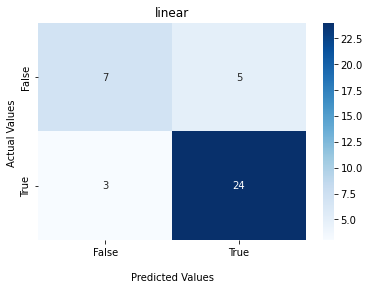

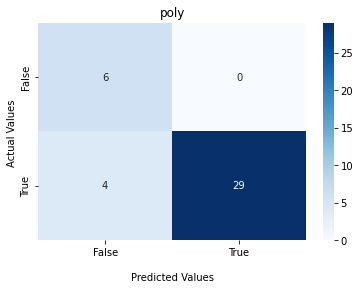

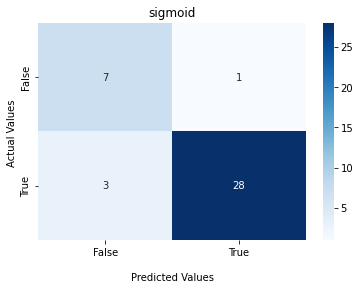

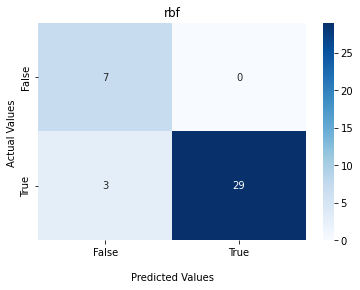

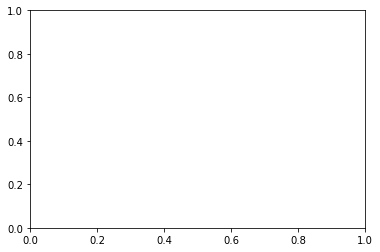

In [42]:
'''support vector machine'''
from sklearn.svm import SVC
for kernel in ['linear', 'poly', 'sigmoid', 'rbf']:
    model = SVC(kernel=kernel)
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    print(kernel)
    print(classification_report(y_test, y_predict))
    print(accuracy_score(y_test, y_predict))
    ax = sns.heatmap(confusion_matrix(y_predict, y_test), annot=True, cmap='Blues')

    ax.set_title(kernel);
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    fig, ax = plt.subplots()
    print('--------------------------------------------------------')


# evaluation

(use text editor to see full output)
the linear kernel accuracy is quite low at 79,5%, this is not a very good model.

poly and sigmoid kernels both have a sufficient, but not high accuracy of 89,7%.

RBF kernel has the highest accuracy of 92%, which is usable. 

However:
in my opinion, the model (with any of the kernels) is not usable for this situation, since the rate of false psoitives is using any kernel relativly high, which is not suitable for this situation.